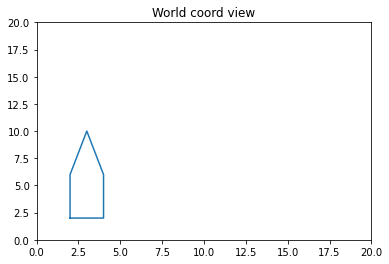

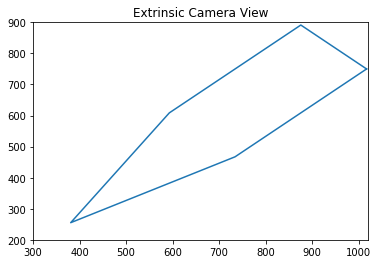

In [ ]:

#Question 1, Image a simple object from world to view by extrinsic matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D      

#Figure 1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("World coord view")

# set limits
ax.set(xlim=(0, 20), ylim=(0, 20))

#plot object in world coord frame
x = [2,4,4,3,2,2]
y = [2,2,6,10,6,2]
z=[0,0,0,0,0,0]

world_vertices = [x,y,z,[1,1,1,1,1,1]]
line = Line2D(world_vertices[0], world_vertices[1])
ax.add_line(line)
plt.show()


# create Transformation matrix
T = np.array([
        [0.707,0.707,0,-5],
        [-0.707,0.707,0,0.5],
        [0,0,1,4]
    ])


# create Extrinsic matrix
K = np.array([
        [-100,0,200],
        [-0,-100,200],
        [0,0,1]
    ])


# Find points in camera coord present in K view
A = np.dot(K,T)
camera_vertices = np.array([np.ones(len(world_vertices[0])),np.ones(len(world_vertices[1])),np.ones(len(world_vertices[2]))]).T
current_point = np.array([[0,0,0,1]]).T

for i in range(6):
  current_point[0][0] = world_vertices[0][i]
  current_point[1][0] = world_vertices[1][i]
  current_point[2][0] = world_vertices[2][i]
  current_point[3][0] = world_vertices[3][i]
  a = np.dot(A,current_point)
  camera_vertices[i][:] = a.T
  
#Figure 2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Extrinsic Camera View")

# set limits
ax.set(xlim=(300, 1020), ylim=(200, 900))

#plot object in camera coord frame

x=[]
for i in range(6):
  x.append(camera_vertices[i][0])

y=[]
for i in range(6):
  y.append(camera_vertices[i][1])
  
line = Line2D(x, y)
ax.add_line(line)
plt.show()


[[1500. 1200.    9.]
 [1100.  800.    9.]
 [1900.    0.    9.]
 [2900. -600.    9.]
 [2300.  400.    9.]
 [1500. 1200.    9.]]


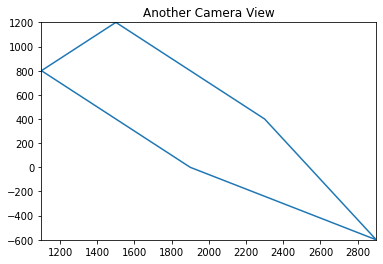

In [ ]:
#Question 3, Another Camera View

#Object in world coord
x = [2,4,4,3,2,2]
y = [2,2,6,10,6,2]
z=[0,0,0,0,0,0]
world_vertices = [x,y,z,[1,1,1,1,1,1]]

# create new Transformation matrix
T = np.array([
        [2,-2,0,3],
        [2,2,0,-2],
        [0,0,4,9]
    ])


# create Extrinsic matrix
K = np.array([
        [-100,0,200],
        [-0,-100,200],
        [0,0,1]
    ])

# Find points in camera coord present in K view
A = np.dot(K,T)
camera_vertices = np.array([np.ones(len(world_vertices[0])),np.ones(len(world_vertices[1])),np.ones(len(world_vertices[2]))]).T
current_point = np.array([[0,0,0,1]]).T

for i in range(6):
  current_point[0][0] = world_vertices[0][i]
  current_point[1][0] = world_vertices[1][i]
  current_point[2][0] = world_vertices[2][i]
  current_point[3][0] = world_vertices[3][i]
  a = np.dot(A,current_point)
  camera_vertices[i][:] = a.T
  
print(camera_vertices)
#Figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Another Camera View")

# set limits
ax.set(xlim=(1100, 2900), ylim=(-600, 1200))

#plot object in camera coord frame

x=[]
for i in range(6):
  x.append(camera_vertices[i][0])

y=[]
for i in range(6):
  y.append(camera_vertices[i][1])
  
line = Line2D(x, y)
ax.add_line(line)
plt.show()





In [ ]:
#Question 7, Homography Estimation
import cv2
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from PIL import Image

# Load hpworld.png from local machine into Colab instance
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving hpworld.png to hpworld (1).png
User uploaded file "hpworld.png" with length 188680 bytes


In [505]:
original_img = np.asarray(Image.open('hpworld.png'))

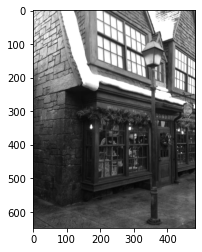

In [506]:
# Display an image

 
plt.imshow(original_img, cmap='gray')
plt.show()

In [507]:
#Choose four point on the image
pts_input = np.array([[250, 300], [300, 330], [300, 370], [250, 400]])
pts_output = np.array([[250, 265], [300, 330], [300, 400],[250, 465]])
matrices = []
for i in range(4):
  x, y, z = pts_input[i][0], pts_input[i][1], 1
  x_t, y_t, z_t = pts_output[i][0], pts_output[i][1], 1
  A_partial = np.array([
      [-x, -y, -1, 0, 0, 0, x_t*x, x_t*y, x_t],
      [0, 0, 0, -x, -y, -1, y_t*x, y_t*y, y_t]
  ])
  matrices.append(A_partial)

A = np.concatenate(matrices, axis=0)
u, s, vh = np.linalg.svd(A, full_matrices=True)
    
# Solution to H 
homography = vh[-1].reshape((3,3))
print(homography)

[[-2.93345955e-03 -1.24389499e-15  3.38476102e-01]
 [-1.64725036e-03 -3.15911028e-03  9.40963563e-01]
 [-4.51301469e-06 -5.63785130e-18 -4.51301469e-04]]


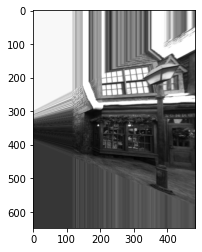

In [508]:
import skimage.transform as transform

#warp image
im_out = transform.warp(original_img, homography, mode = 'edge')
plt.imshow(im_out, cmap='gray')
plt.show()